#### Importing required libraries

In [48]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np

#### Loading and modifying the dataset

In [ ]:
# Load the dataset
stellar_data = pd.read_csv('star_classification.csv')

In [5]:
# Check for null values 
print(stellar_data.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [6]:
stellar_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Removing unwanted columns 
stellar_data.drop(columns=['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'plate', 'MJD', 'fiber_ID'], inplace=True, axis=1)

In [12]:
stellar_data.head()

,u,g,r,i,z,field_ID,spec_obj_ID,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,79,6.543777e+18,GALAXY,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,GALAXY,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,120,5.152200e+18,GALAXY,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,214,1.030107e+19,GALAXY,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,137,6.891865e+18,GALAXY,0.116123


In [14]:
stellar_data.shape

(100000, 9)

In [15]:
stellar_data.describe()

,u,g,r,i,z,field_ID,spec_obj_ID,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,186.130520,5.783882e+18,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,149.011073,3.324016e+18,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,11.000000,2.995191e+17,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,82.000000,2.844138e+18,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,146.000000,5.614883e+18,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,241.000000,8.332144e+18,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,989.000000,1.412694e+19,7.011245


#### Plotting a heatmap

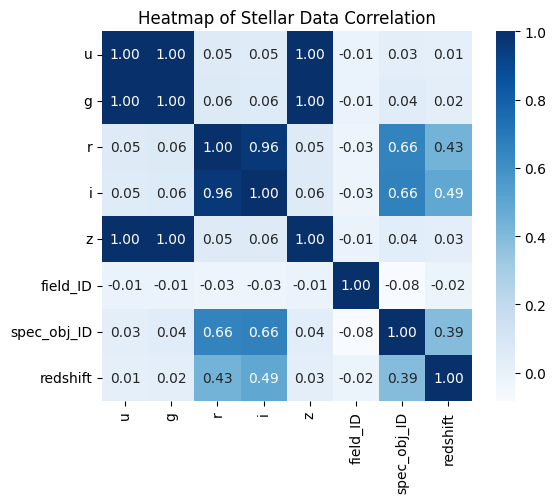

In [ ]:
# Heatmap
stellar_data_temp = stellar_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = stellar_data_temp.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, cbar=True)
plt.title('Heatmap of Stellar Data Correlation')
plt.show()

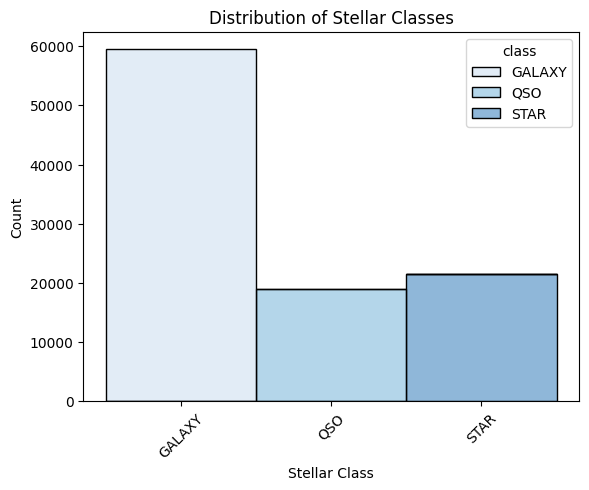

In [ ]:
# Histogram of Stellar Classes
sns.histplot(
    data=stellar_data,
    x="class",
    palette="Blues",
    hue="class",
    multiple="stack",
    kde=True,
)
plt.title("Distribution of Stellar Classes")
plt.xlabel("Stellar Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Preparing the data

In [47]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
X = stellar_data[features]
# One hot encoding the target variable 'class'
y = pd.get_dummies(stellar_data['class'])
model_columns = y.columns 

#### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating the ANN

In [ ]:
# import necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import ReLU

In [38]:
# Initialising the ANN
model = Sequential()
# Adding the input layer
model.add(Dense(units=6, activation='relu'))
# Adding the hidden layers and dropout layers
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=11, activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units=3, activation='softmax'))

In [39]:
# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Setting the Early Stopping

In [40]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [41]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.33, callbacks=[early_stopping])

Epoch 1/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7696 - loss: 0.6321 - val_accuracy: 0.9421 - val_loss: 0.1927
Epoch 2/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9152 - loss: 0.2501 - val_accuracy: 0.9541 - val_loss: 0.1497
Epoch 3/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9364 - loss: 0.2282 - val_accuracy: 0.9563 - val_loss: 0.1388
Epoch 4/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9426 - loss: 0.1915 - val_accuracy: 0.9597 - val_loss: 0.1321
Epoch 5/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9468 - loss: 0.1760 - val_accuracy: 0.9629 - val_loss: 0.1261
Epoch 6/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9486 - loss: 0.1709 - val_accuracy: 0.9615 - val_loss: 0.1279
Epoch 7/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9530 - loss: 0.1624 - val_accuracy: 0.9623 - val_loss: 0.1245
Epoch 8/100
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9517 - loss: 0

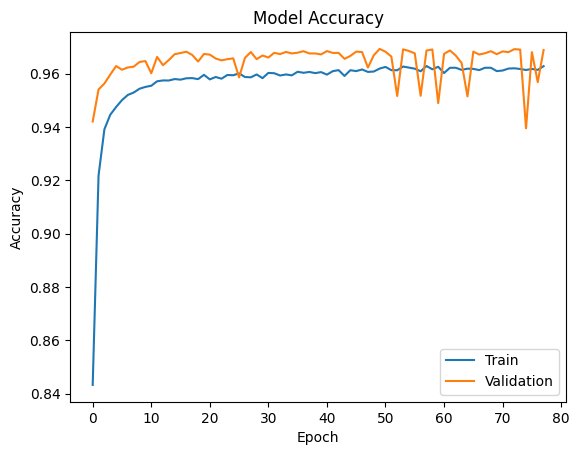

In [ ]:
# Accuracy history summary
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

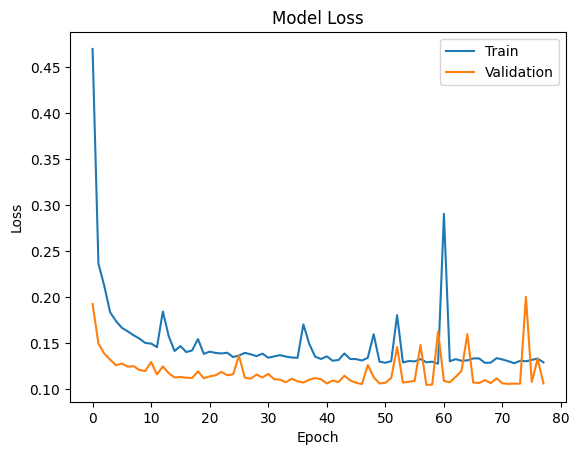

In [45]:
# Loss history summary
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [50]:
# Predictions 
predictions = model.predict(X_test)
predict_indices = np.argmax(predictions, axis=1)
predict_classes = [model_columns[idx] for idx in predict_indices]
print("Predicted classes for the test set:", predict_classes[:10])

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step
Predicted classes for the test set: ['GALAXY', 'GALAXY', 'STAR', 'QSO', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'STAR']


#### Metrics

In [53]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
y_pred_indices = np.argmax(predictions, axis=1)
y_true_indices = np.argmax(y_test.values, axis=1)
cm = confusion_matrix(y_pred_indices, y_true_indices)
cm 

array([[14529,   395,     9],
       [  158,  4399,     0],
       [  150,     2,  5358]])

In [58]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true_indices, y_pred_indices))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14837
           1       0.97      0.92      0.94      4796
           2       0.97      1.00      0.99      5367

    accuracy                           0.97     25000
   macro avg       0.97      0.96      0.97     25000
weighted avg       0.97      0.97      0.97     25000



#### Saving the model

In [59]:
import joblib
joblib.dump(model, 'stellar_classification_model.pkl')

['stellar_classification_model.pkl']